In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn
from sklearn.decomposition import PCA

In [6]:
df = pd.read_csv('churn_raw_data.csv',dtype={'locationid':np.int64})

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

In [8]:
print (df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              1          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              2          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              3          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              4          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              5          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9996       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9997       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9998       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9999       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999       10000      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  

(array([1919., 1874., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

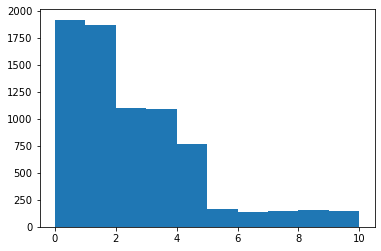

In [11]:
plt.hist(df['Children'])

(array([853., 756., 714., 739., 708., 739., 728., 728., 761., 799.]),
 array([18. , 25.1, 32.2, 39.3, 46.4, 53.5, 60.6, 67.7, 74.8, 81.9, 89. ]),
 <BarContainer object of 10 artists>)

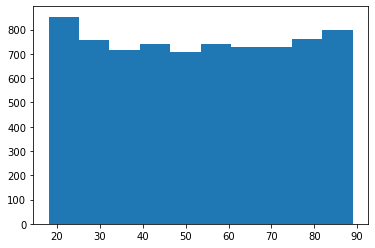

In [12]:
plt.hist(df['Age'])

(array([2.912e+03, 2.642e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([   740.66 ,  26556.664,  52372.668,  78188.672, 104004.676,
        129820.68 , 155636.684, 181452.688, 207268.692, 233084.696,
        258900.7  ]),
 <BarContainer object of 10 artists>)

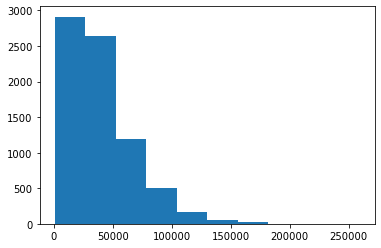

In [13]:
plt.hist(df['Income'])

(array([2337., 1473.,  568.,  132.,   30.,  221.,  540.,  870., 1330.,
        1568.]),
 array([ 1.00025934,  8.10016141, 15.20006347, 22.29996554, 29.3998676 ,
        36.49976967, 43.59967174, 50.6995738 , 57.79947587, 64.89937793,
        71.99928   ]),
 <BarContainer object of 10 artists>)

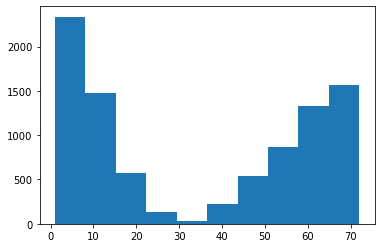

In [14]:
plt.hist(df['Tenure'])

(array([1031., 2062., 1087.,  255.,   98.,  370.,  844., 1399., 1484.,
         349.]),
 array([ 155.5067148 ,  855.85424332, 1556.20177184, 2256.54930036,
        2956.89682888, 3657.2443574 , 4357.59188592, 5057.93941444,
        5758.28694296, 6458.63447148, 7158.982     ]),
 <BarContainer object of 10 artists>)

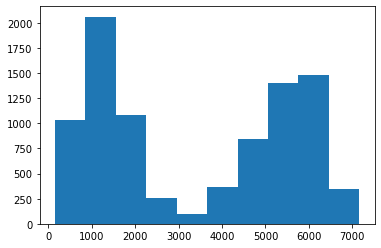

In [15]:
plt.hist(df['Bandwidth_GB_Year'])

In [16]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Children'].fillna(df['Children'].median(), inplace = True)
df['Income'].fillna(df['Income'].median(), inplace = True)
df['Tenure'].fillna(df['Tenure'].mean(), inplace = True)
df['Bandwidth_GB_Year'].fillna(df['Bandwidth_GB_Year'].mean(), inplace = True)

In [17]:
df['Techie'] = df['Techie'].fillna(df['Techie'].mode()[0])
df['Phone'] = df['Phone'].fillna(df['Phone'].mode()[0])
df['TechSupport'] = df['TechSupport'].fillna(df['TechSupport'].mode()[0])

In [18]:
df['Children_z'] = stats.zscore(df['Children'])
df['Age_z'] = stats.zscore(df['Age'])
df['Income_z'] = stats.zscore(df['Income'])
df['Outage_sec_perweek_z'] = stats.zscore(df['Outage_sec_perweek'])
df['Email_z'] = stats.zscore(df['Email'])
df['Contacts_z'] = stats.zscore(df['Contacts'])
df['Yearly_equip_failure_z'] = stats.zscore(df['Yearly_equip_failure'])
df['Tenure_z'] = stats.zscore(df['Tenure'])
df['MonthlyCharge_z'] = stats.zscore(df['MonthlyCharge'])
df['Bandwidth_GB_Year_z'] = stats.zscore(df['Bandwidth_GB_Year'])

In [19]:
len(df.query('Children_z > 3 | Children_z < -3'))

302

In [20]:
len(df.query('Age_z > 3 | Age_z < -3'))

0

In [21]:
len(df.query('Income_z > 3 | Income_z < -3'))

193

In [22]:
len(df.query('Outage_sec_perweek_z > 3 | Outage_sec_perweek_z < -3'))

491

In [23]:
len(df.query('Email_z > 3 | Email_z < -3'))

12

In [24]:
len(df.query('Contacts_z > 3 | Contacts_z < -3'))

165

In [25]:
len(df.query('Yearly_equip_failure_z > 3 | Yearly_equip_failure_z < -3'))

94

In [26]:
len(df.query('Tenure_z > 3 | Tenure_z < -3'))

0

In [27]:
len(df.query('MonthlyCharge_z > 3 | MonthlyCharge_z < -3'))

3

In [28]:
len(df.query('Bandwidth_GB_Year_z > 3 | Bandwidth_GB_Year_z < -3'))

0

(array([1919., 4369., 1100., 1096.,  769.,  161.,  135.,  149.,  158.,
         144.]),
 array([-0.9463232 , -0.42707864,  0.09216591,  0.61141046,  1.13065501,
         1.64989957,  2.16914412,  2.68838867,  3.20763323,  3.72687778,
         4.24612233]),
 <BarContainer object of 10 artists>)

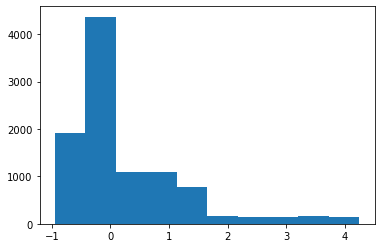

In [29]:
plt.hist(df['Children_z'])

(array([ 853.,  756.,  714.,  739., 3183.,  739.,  728.,  728.,  761.,
         799.]),
 array([-1.95952825, -1.56513121, -1.17073416, -0.77633712, -0.38194007,
         0.01245697,  0.40685402,  0.80125106,  1.19564811,  1.59004516,
         1.9844422 ]),
 <BarContainer object of 10 artists>)

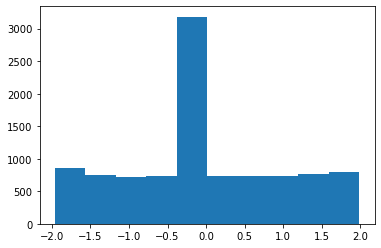

In [30]:
plt.hist(df['Age_z'])

(array([2.912e+03, 5.132e+03, 1.193e+03, 5.080e+02, 1.670e+02, 6.000e+01,
        2.100e+01, 4.000e+00, 1.000e+00, 2.000e+00]),
 array([-1.51597813, -0.47276544,  0.57044725,  1.61365994,  2.65687263,
         3.70008532,  4.74329801,  5.7865107 ,  6.82972339,  7.87293608,
         8.91614877]),
 <BarContainer object of 10 artists>)

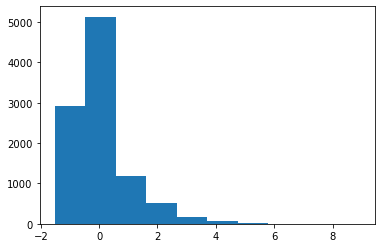

In [31]:
plt.hist(df['Income_z'])

(array([ 176., 2605., 5237., 1428.,   54.,    0.,    9.,  144.,  282.,
          65.]),
 array([-1.82213355, -1.13325203, -0.44437051,  0.24451101,  0.93339253,
         1.62227405,  2.31115557,  3.00003709,  3.68891861,  4.37780014,
         5.06668166]),
 <BarContainer object of 10 artists>)

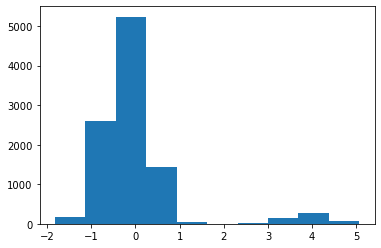

In [32]:
plt.hist(df['Outage_sec_perweek_z'])

(array([  23.,  140.,  501., 1317., 3675., 2328., 1296.,  554.,  151.,
          15.]),
 array([-3.64075402, -2.9136608 , -2.18656759, -1.45947438, -0.73238116,
        -0.00528795,  0.72180526,  1.44889848,  2.17599169,  2.9030849 ,
         3.63017812]),
 <BarContainer object of 10 artists>)

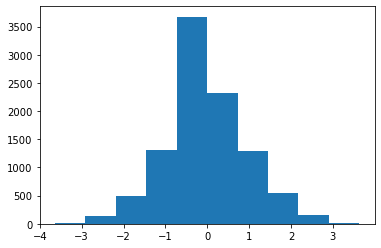

In [33]:
plt.hist(df['Email_z'])

(array([3.680e+03, 3.675e+03, 1.872e+03, 0.000e+00, 6.080e+02, 1.370e+02,
        0.000e+00, 2.000e+01, 5.000e+00, 3.000e+00]),
 array([-1.0058517 , -0.29764793,  0.41055584,  1.11875961,  1.82696339,
         2.53516716,  3.24337093,  3.9515747 ,  4.65977847,  5.36798224,
         6.07618601]),
 <BarContainer object of 10 artists>)

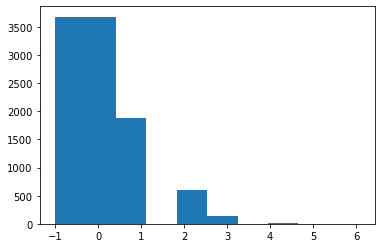

In [34]:
plt.hist(df['Contacts_z'])

(array([6.727e+03, 2.670e+03, 0.000e+00, 5.090e+02, 8.600e+01, 0.000e+00,
        7.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.62586353,  0.31764933,  1.26116219,  2.20467505,  3.14818792,
         4.09170078,  5.03521364,  5.9787265 ,  6.92223936,  7.86575222,
         8.80926509]),
 <BarContainer object of 10 artists>)

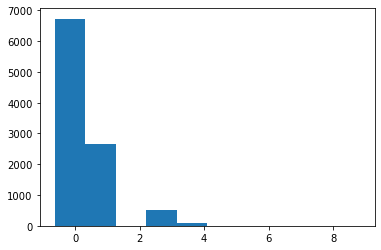

In [35]:
plt.hist(df['Yearly_equip_failure_z'])

(array([2337., 1473.,  568.,  132.,  961.,  221.,  540.,  870., 1330.,
        1568.]),
 array([-1.33053844, -1.04853581, -0.76653319, -0.48453057, -0.20252794,
         0.07947468,  0.3614773 ,  0.64347993,  0.92548255,  1.20748517,
         1.4894878 ]),
 <BarContainer object of 10 artists>)

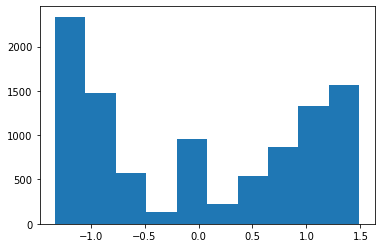

In [36]:
plt.hist(df['Tenure_z'])

(array([ 219.,  947., 1917., 2272., 1809., 1151.,  968.,  520.,  187.,
          10.]),
 array([-2.22856466, -1.67847193, -1.12837919, -0.57828646, -0.02819372,
         0.52189901,  1.07199175,  1.62208448,  2.17217722,  2.72226995,
         3.27236269]),
 <BarContainer object of 10 artists>)

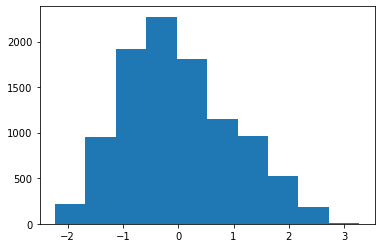

In [37]:
plt.hist(df['MonthlyCharge_z'])

(array([1031., 2062., 1087.,  255., 1119.,  370.,  844., 1399., 1484.,
         349.]),
 array([-1.5648567 , -1.22695045, -0.8890442 , -0.55113795, -0.21323169,
         0.12467456,  0.46258081,  0.80048706,  1.13839331,  1.47629956,
         1.81420581]),
 <BarContainer object of 10 artists>)

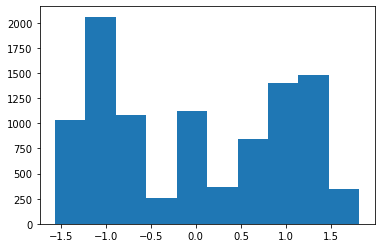

In [38]:
plt.hist(df['Bandwidth_GB_Year_z'])

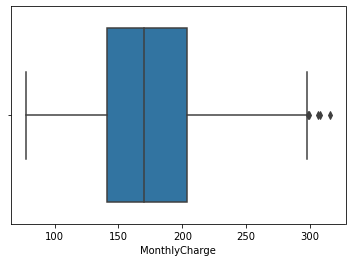

In [39]:
boxplot=seaborn.boxplot(x='MonthlyCharge',data=df)

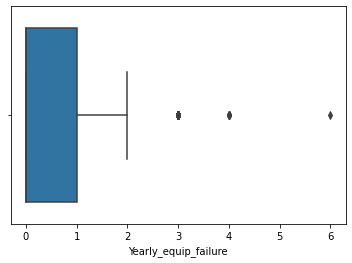

In [40]:
boxplot=seaborn.boxplot(x='Yearly_equip_failure',data=df)

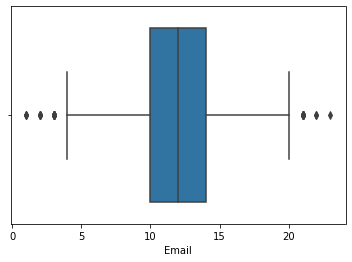

In [41]:
boxplot=seaborn.boxplot(x='Email',data=df)

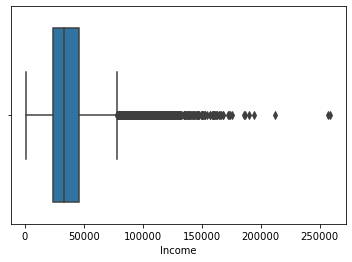

In [42]:
boxplot=seaborn.boxplot(x='Income',data=df)

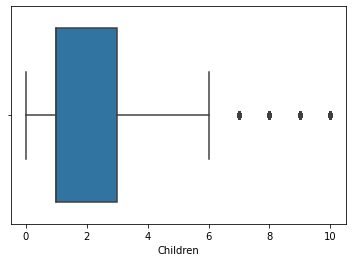

In [43]:
boxplot=seaborn.boxplot(x='Children',data=df)

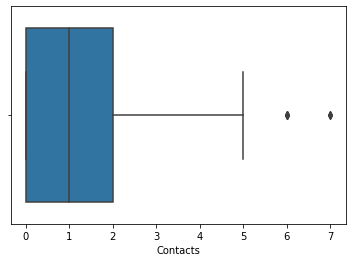

In [44]:
boxplot=seaborn.boxplot(x='Contacts',data=df)

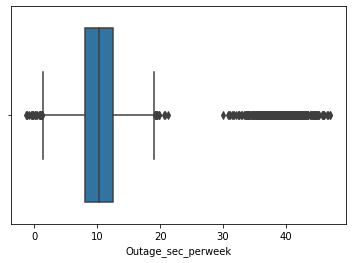

In [45]:
boxplot=seaborn.boxplot(x='Outage_sec_perweek',data=df)

In [46]:
churn_MonthlyCharge_z = df.query('MonthlyCharge_z > 3 | MonthlyCharge_z < -3')
churn_MonthlyCharge_z_sort = churn_MonthlyCharge_z.sort_values(['MonthlyCharge'], ascending = False)
churn_MonthlyCharge_z_sort.to_csv(r'C:\Users\wstul\d206\churn_MonthlyCharge_z_sort.csv')

In [47]:
churn_Yearly_equip_failure_z = df.query('Yearly_equip_failure_z > 3 | Yearly_equip_failure_z < -3')
churn_Yearly_equip_failure_z_sort = churn_Yearly_equip_failure_z.sort_values(['Yearly_equip_failure'], ascending = False)
churn_Yearly_equip_failure_z_sort.to_csv(r'C:\Users\wstul\d206\churn_Yearly_equip_failure_z_sort.csv')

In [48]:
churn_Email_z = df.query('Email_z > 3 | Email_z < -3')
churn_Email_z_sort = churn_Email_z.sort_values(['Email'], ascending = False)
churn_Email_z_sort.to_csv(r'C:\Users\wstul\d206\churn_Email_z_sort.csv')

In [49]:
churn_Income_z = df.query('Income_z > 3 | Income_z < -3')
churn_Income_z_sort = churn_Income_z.sort_values(['Income'], ascending = False)
churn_Income_z_sort.to_csv(r'C:\Users\wstul\d206\churn_Income_z_sort.csv')

In [50]:
churn_Children_z = df.query('Children_z > 3 | Children_z < -3')
churn_Children_z_sort = churn_Children_z.sort_values(['Children'], ascending = False)
churn_Children_z_sort.to_csv(r'C:\Users\wstul\d206\churn_Children_z_sort.csv')

In [51]:
churn_Contacts_z = df.query('Contacts_z > 3 | Contacts_z < -3')
churn_Contacts_z_sort = churn_Contacts_z.sort_values(['Contacts'], ascending = False)
churn_Contacts_z_sort.to_csv(r'C:\Users\wstul\d206\churn_Contacts_z_sort.csv')

In [52]:
churn_outage_sec_z = df.query('Outage_sec_perweek_z > 3 | Outage_sec_perweek_z < -3')
churn_outage_sec_z_sort = churn_outage_sec_z.sort_values(['Outage_sec_perweek_z'], ascending = False)
churn_outage_sec_z_sort.to_csv(r'C:\Users\wstul\d206\churn_outage_sec_z_sort.csv')

In [53]:
df.drop(['Children_z', 'Age_z', 'Income_z', 'Outage_sec_perweek_z', 'Email_z', 'Contacts_z', 'Yearly_equip_failure_z', 'Tenure_z', 'MonthlyCharge_z', 'Bandwidth_GB_Year_z'], axis=1, inplace=True)

In [54]:
df_marital_ohe = pd.get_dummies(df['Marital'], prefix = 'Marital', drop_first = False)
df_marital_ohe

,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
9995,0,1,0,0,0
9996,1,0,0,0,0
9997,0,0,1,0,0
9998,0,0,0,1,0


In [55]:
df = pd.concat([df, df_marital_ohe], axis = 1)
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,City,State,County,Zip,Lat,Lng,...,item4,item5,item6,item7,item8,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed
0,1,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,3,4,4,3,4,0,0,0,0,1
1,2,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,3,4,3,4,4,0,1,0,0,0
2,3,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,4,4,3,3,3,0,0,0,0,1
3,4,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,2,5,4,3,3,0,1,0,0,0
4,5,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,3,4,4,4,5,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,3,4,3,2,3,0,1,0,0,0
9996,9997,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,4,4,5,2,5,1,0,0,0,0
9997,9998,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,4,4,4,4,5,0,0,1,0,0
9998,9999,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,4,3,3,5,4,0,0,0,1,0


In [56]:
df.drop(['Marital'], axis=1, inplace=True)

In [57]:
Education
scale_mapper = {'Month-to-month' : 1, 'One year' : 2, 'Two Year' : 3}
df['Contract_Duration'] = df['Contract'].replace(scale_mapper)
df['Contract_Duration']

NameError: name 'Education' is not defined

In [58]:
scale_mapper = {'Month-to-month' : 1, 'One year' : 2, 'Two Year' : 3}
df['Contract_Duration'] = df['Contract'].replace(scale_mapper)
df['Contract_Duration']

0       2
1       1
2       3
3       3
4       1
       ..
9995    1
9996    3
9997    1
9998    3
9999    1
Name: Contract_Duration, Length: 10000, dtype: int64

In [59]:
scale_mapper = {'No Schooling Completed' : 1, 'Nursery School to 8th Grade' : 2, '9th Grade to 12th Grade, No Diploma' : 3, 'GED or Alternative Credential' : 4, 'Regular High School Diploma' : 5, 'Some College, Less than 1 Year' : 6, 'Some College, 1 or More Years, No Degree' : 7, 'Professional School Degree' : 8, "Associate's Degree" : 9, "Bachelor's Degree" : 10, "Master's Degree" : 11, 'Doctorate Degree' : 12}
df['Education_Level'] = df['Education'].replace(scale_mapper)
df['Education_Level']

0       11
1        5
2        5
3       12
4       11
        ..
9995     6
9996     5
9997     2
9998    10
9999     4
Name: Education_Level, Length: 10000, dtype: int64

In [60]:
test_pca = df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Education_Level', 'Contract_Duration']]

In [61]:
test_pca_normalized = (test_pca - test_pca.mean()) / test_pca.std()

In [62]:
pca = PCA(n_components = test_pca.shape[1])
pca.fit(test_pca_normalized)

PCA(n_components=12)

In [63]:
test_pca2 = pd.DataFrame(pca.transform(test_pca_normalized), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'])

In [64]:
loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12'], index = test_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Children,-0.001446,0.036638,0.627933,-0.086740,0.084185,0.227046,0.057255,0.428343,-0.035572,-0.591384,0.009741,-0.018510
Age,-0.012263,-0.056062,-0.468762,0.213257,0.366378,-0.002998,0.021525,0.476647,-0.587347,-0.097486,0.121004,0.021713
Income,0.005824,-0.016871,0.127524,0.532317,-0.315389,0.607478,0.142741,0.203534,-0.018019,0.405742,-0.069309,0.001262
Outage_sec_perweek,0.022743,0.700899,0.001454,0.081363,-0.024044,0.034517,-0.089702,-0.030587,0.058208,0.019948,0.697900,0.000460
Email,-0.021088,0.063269,-0.196179,-0.482197,-0.306685,-0.003164,-0.296867,0.646732,0.246924,0.245291,-0.054060,0.005688
Contacts,0.004771,-0.004508,-0.437291,-0.077558,0.329291,0.432270,0.339968,-0.002589,0.576485,-0.243833,0.006763,-0.002948
Yearly_equip_failure,0.015878,0.053182,0.228913,0.411054,0.533020,-0.343511,-0.212740,0.252415,0.422418,0.264838,-0.126055,-0.002357
Tenure,0.704498,-0.059355,-0.020411,-0.003147,-0.016332,-0.015116,0.001592,0.022534,-0.004446,0.004717,0.039139,-0.705091
MonthlyCharge,0.045445,0.693168,-0.115822,0.033991,-0.022473,-0.002895,0.039972,-0.034185,-0.126747,-0.112479,-0.684523,-0.048113
Bandwidth_GB_Year,0.706502,-0.010225,0.003068,-0.006535,-0.019052,-0.007244,0.004739,0.010827,0.005240,-0.017968,-0.011603,0.706865


In [65]:
cov_matrix = np.dot(test_pca_normalized.T, test_pca_normalized) / test_pca.shape[0]

In [66]:
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

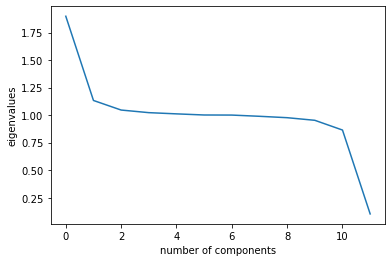

In [67]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.show()

In [68]:
df.to_csv(r'C:\Users\wstul\d206\William_Stults_churn_raw_data_cleaned.csv')